# **HOME CREDIT SCORECARD**
Virtual Internship Experience
Home Credit Indonesia X Rakamin Academy

**Created by Nabila Putri Listyanto**

## Problem Research

**Background:**

Home Credit uses various statistical methods and Machine Learning to make credit score predictions. Companies ask to unlock the maximum potential of their data. Doing so will ensure that clients capable of repayment are accepted and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


**Objective:**
Identify customers with characteristics of potential clients who have difficulty repaying loans.

**Goals:**
Improve loan approval process by identifying potential clients who are likely to have difficulty repaying loans.

**Metrics**
Classification Report and AUC Score

**Actions:**
1. Visualization for business insights by EDA
2. Perform data preprocessing
2. Build models with machine learning algorithms.
3. Build models with machine learning algorithms with hyperparameter tuning.
4. Provide recommendations for company to increase their clients succeed in applying for loans.

## Data Preparation

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder #label encoding
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

In [4]:
#mount to gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load dataset application_train
df_train = pd.read_csv("/content/drive/My Drive/home-credit-indonesia/application_train.csv")
print('The dataset has %d rows dan %d columns.' % df_train.shape)
df_train.head()

The dataset has 307511 rows dan 122 columns.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#view summary of DataFrame
df_train.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

##Exploratory Data Analysis (EDA)

In [7]:
#copy dataframe
df = df_train.copy()

### Univariate Analysis

The Number of Customers Based on Their Repayment Abilities

In [8]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))

In [9]:
target_grp = (df[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Reds')

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [10]:
grp = df['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Reds')

,index,TARGET
0,No Payment Difficulties,0.919271
1,Payment Difficulties,0.080729


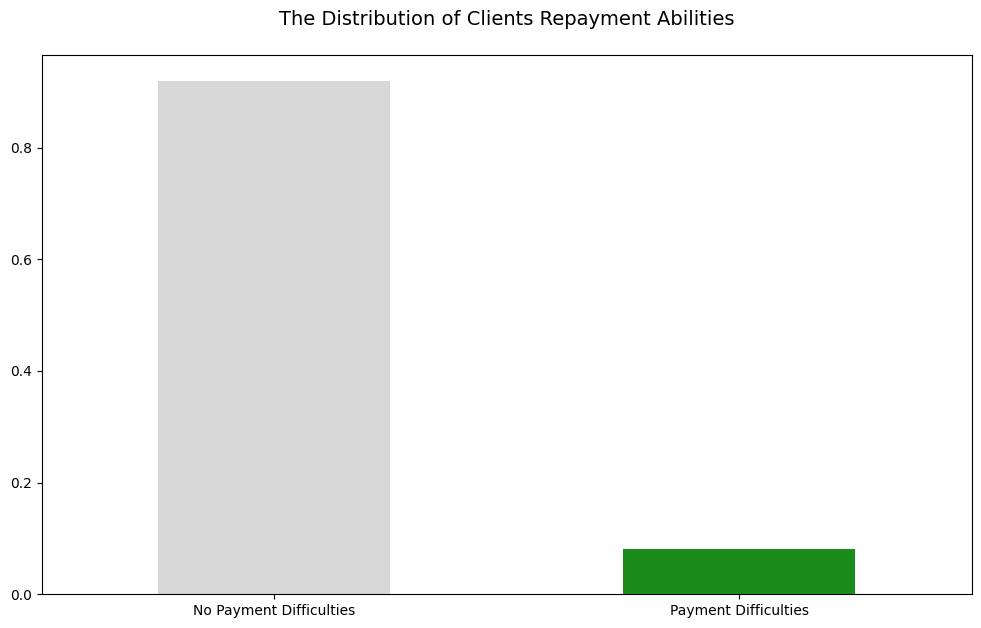

In [11]:
fig = plt.figure(figsize = (12,7))
grp.plot(kind='bar', color= ['lightgrey','green'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.show()

There are about 91% loans which is equal to about 282K with `TARGET` = 0, which indicates that client did not had any problems in repaying the loan in given time. While only 9% of the total loans (about 24K applicants) in this dataset involved the clients having problems in repaying the loan.

### Bivariate Analysis

Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

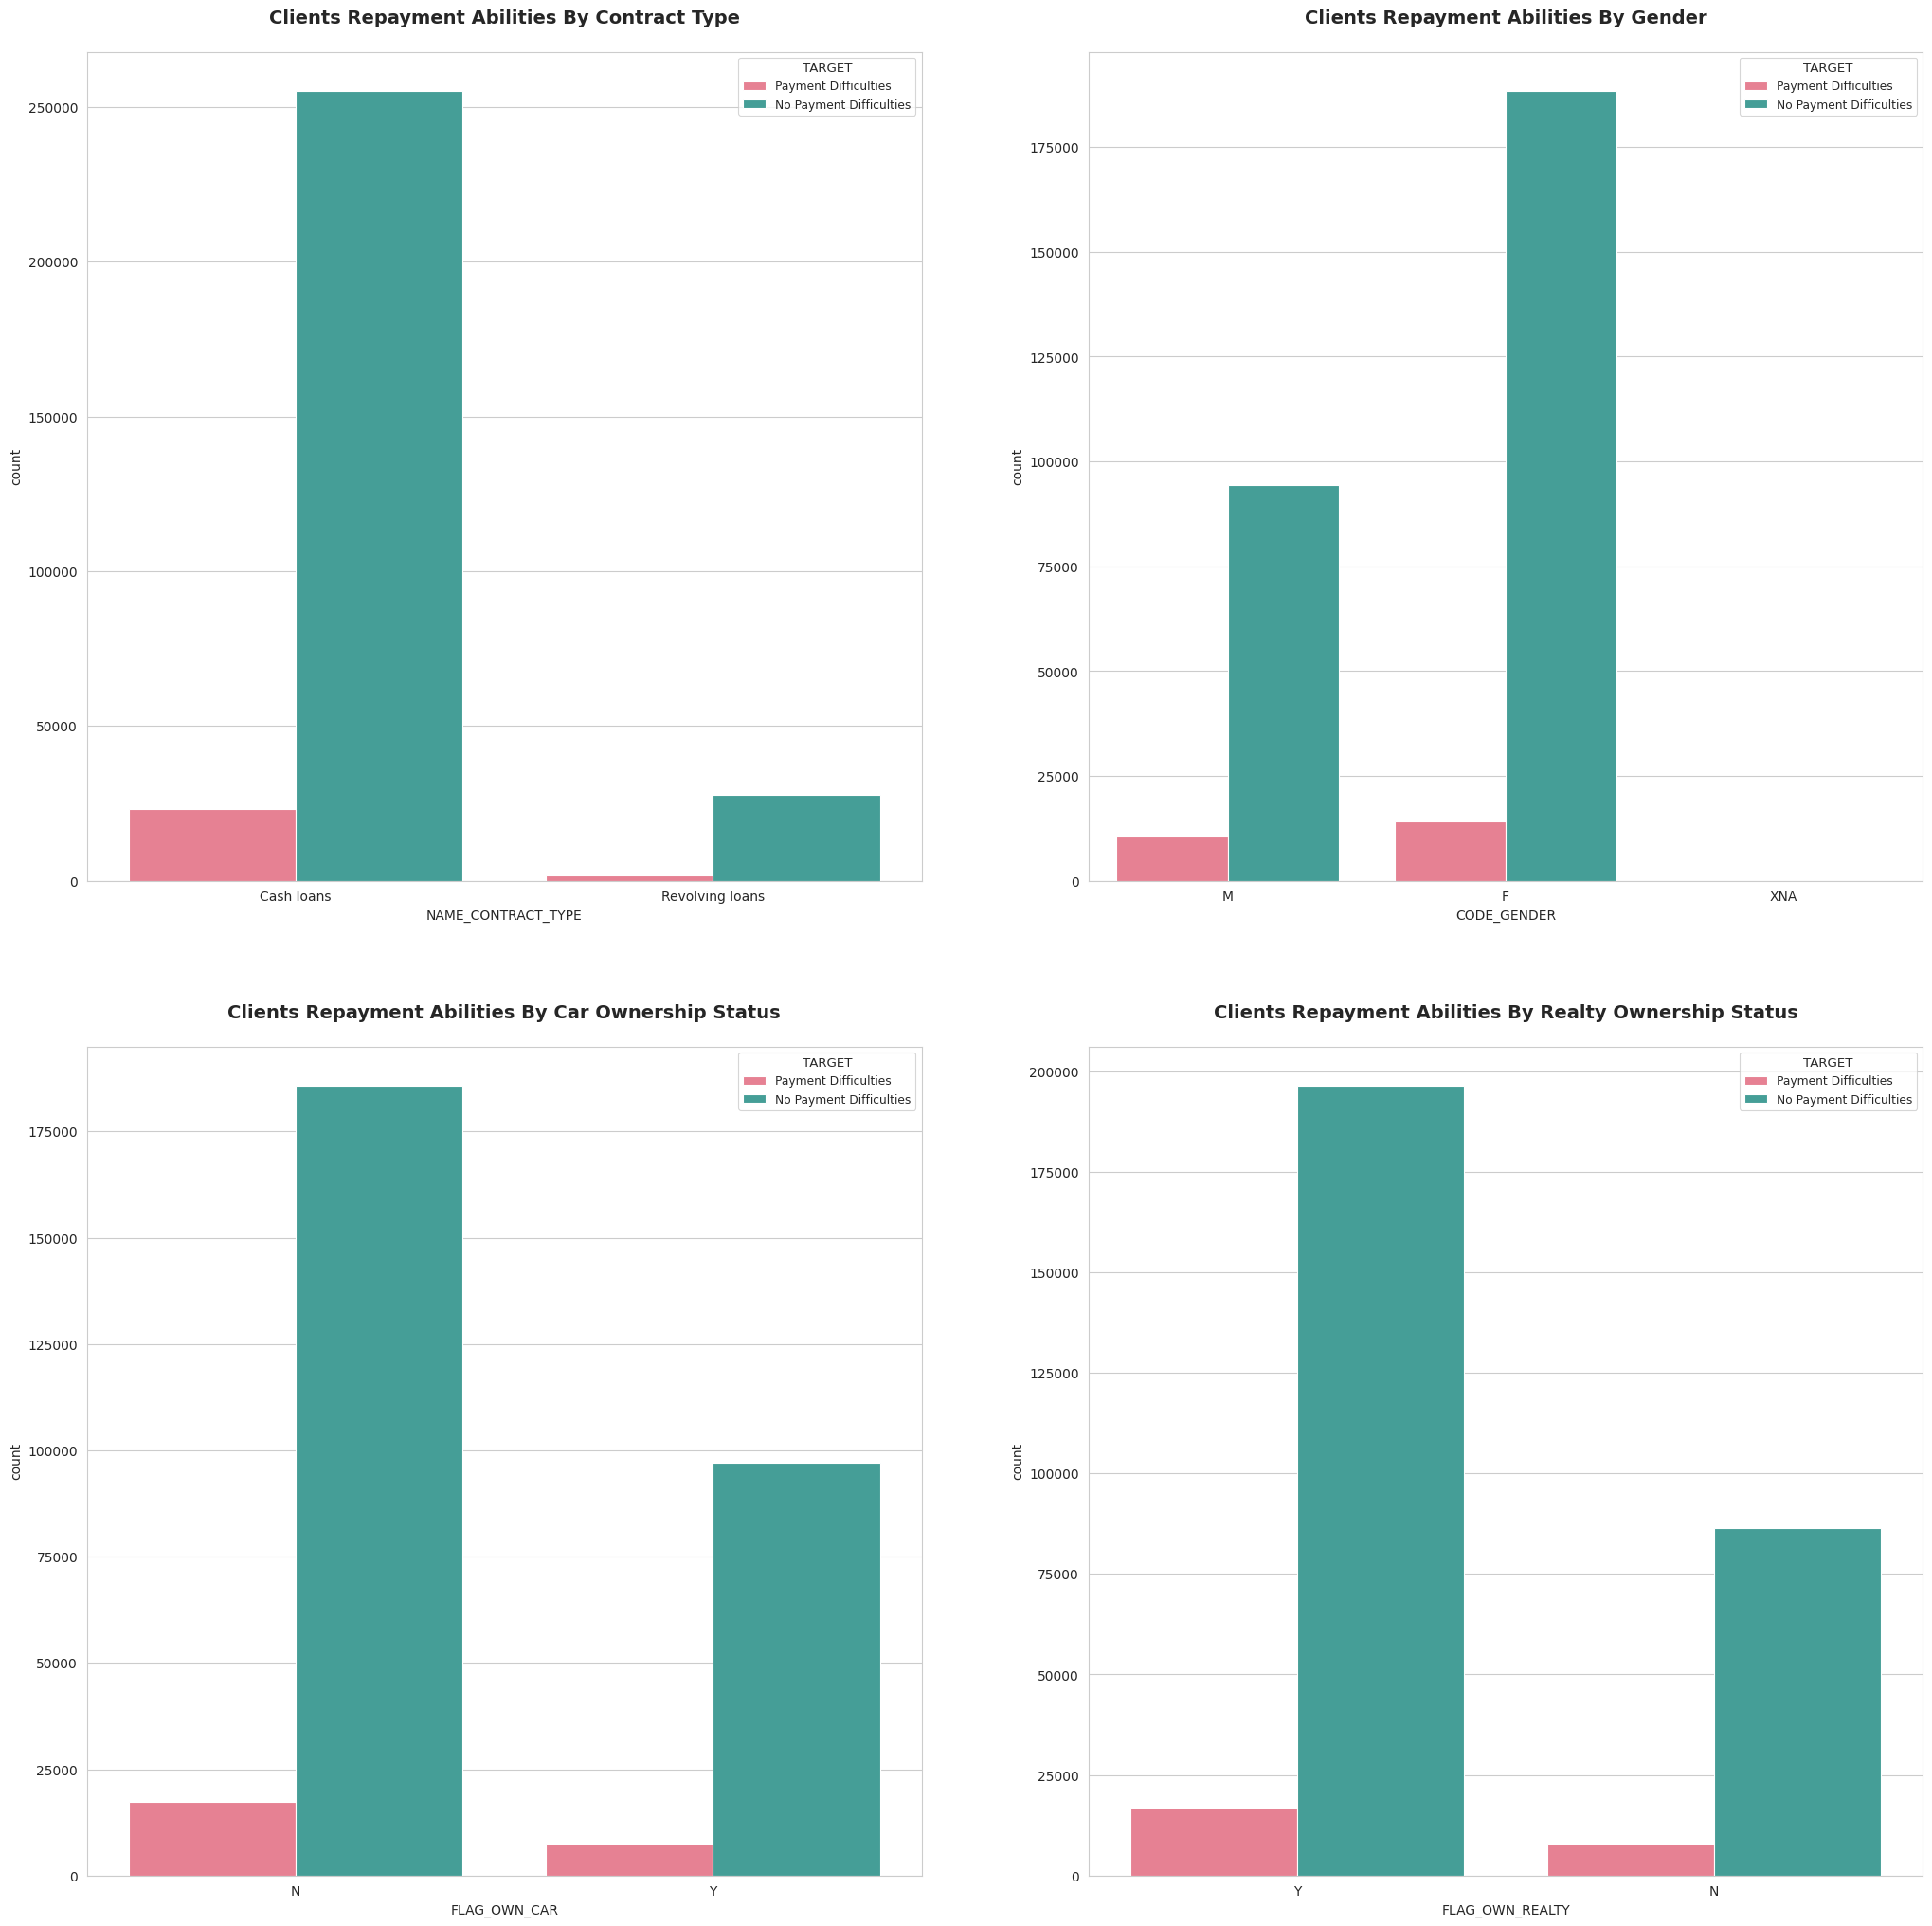

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = df, hue = 'TARGET', palette = 'husl', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = df, hue = 'TARGET', palette = 'husl', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = df, hue = 'TARGET', palette = 'husl', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = df, hue = 'TARGET', palette = 'husl', ax=ax[1][1])

Suite Type, Income Type, Education Type, and Family Status

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

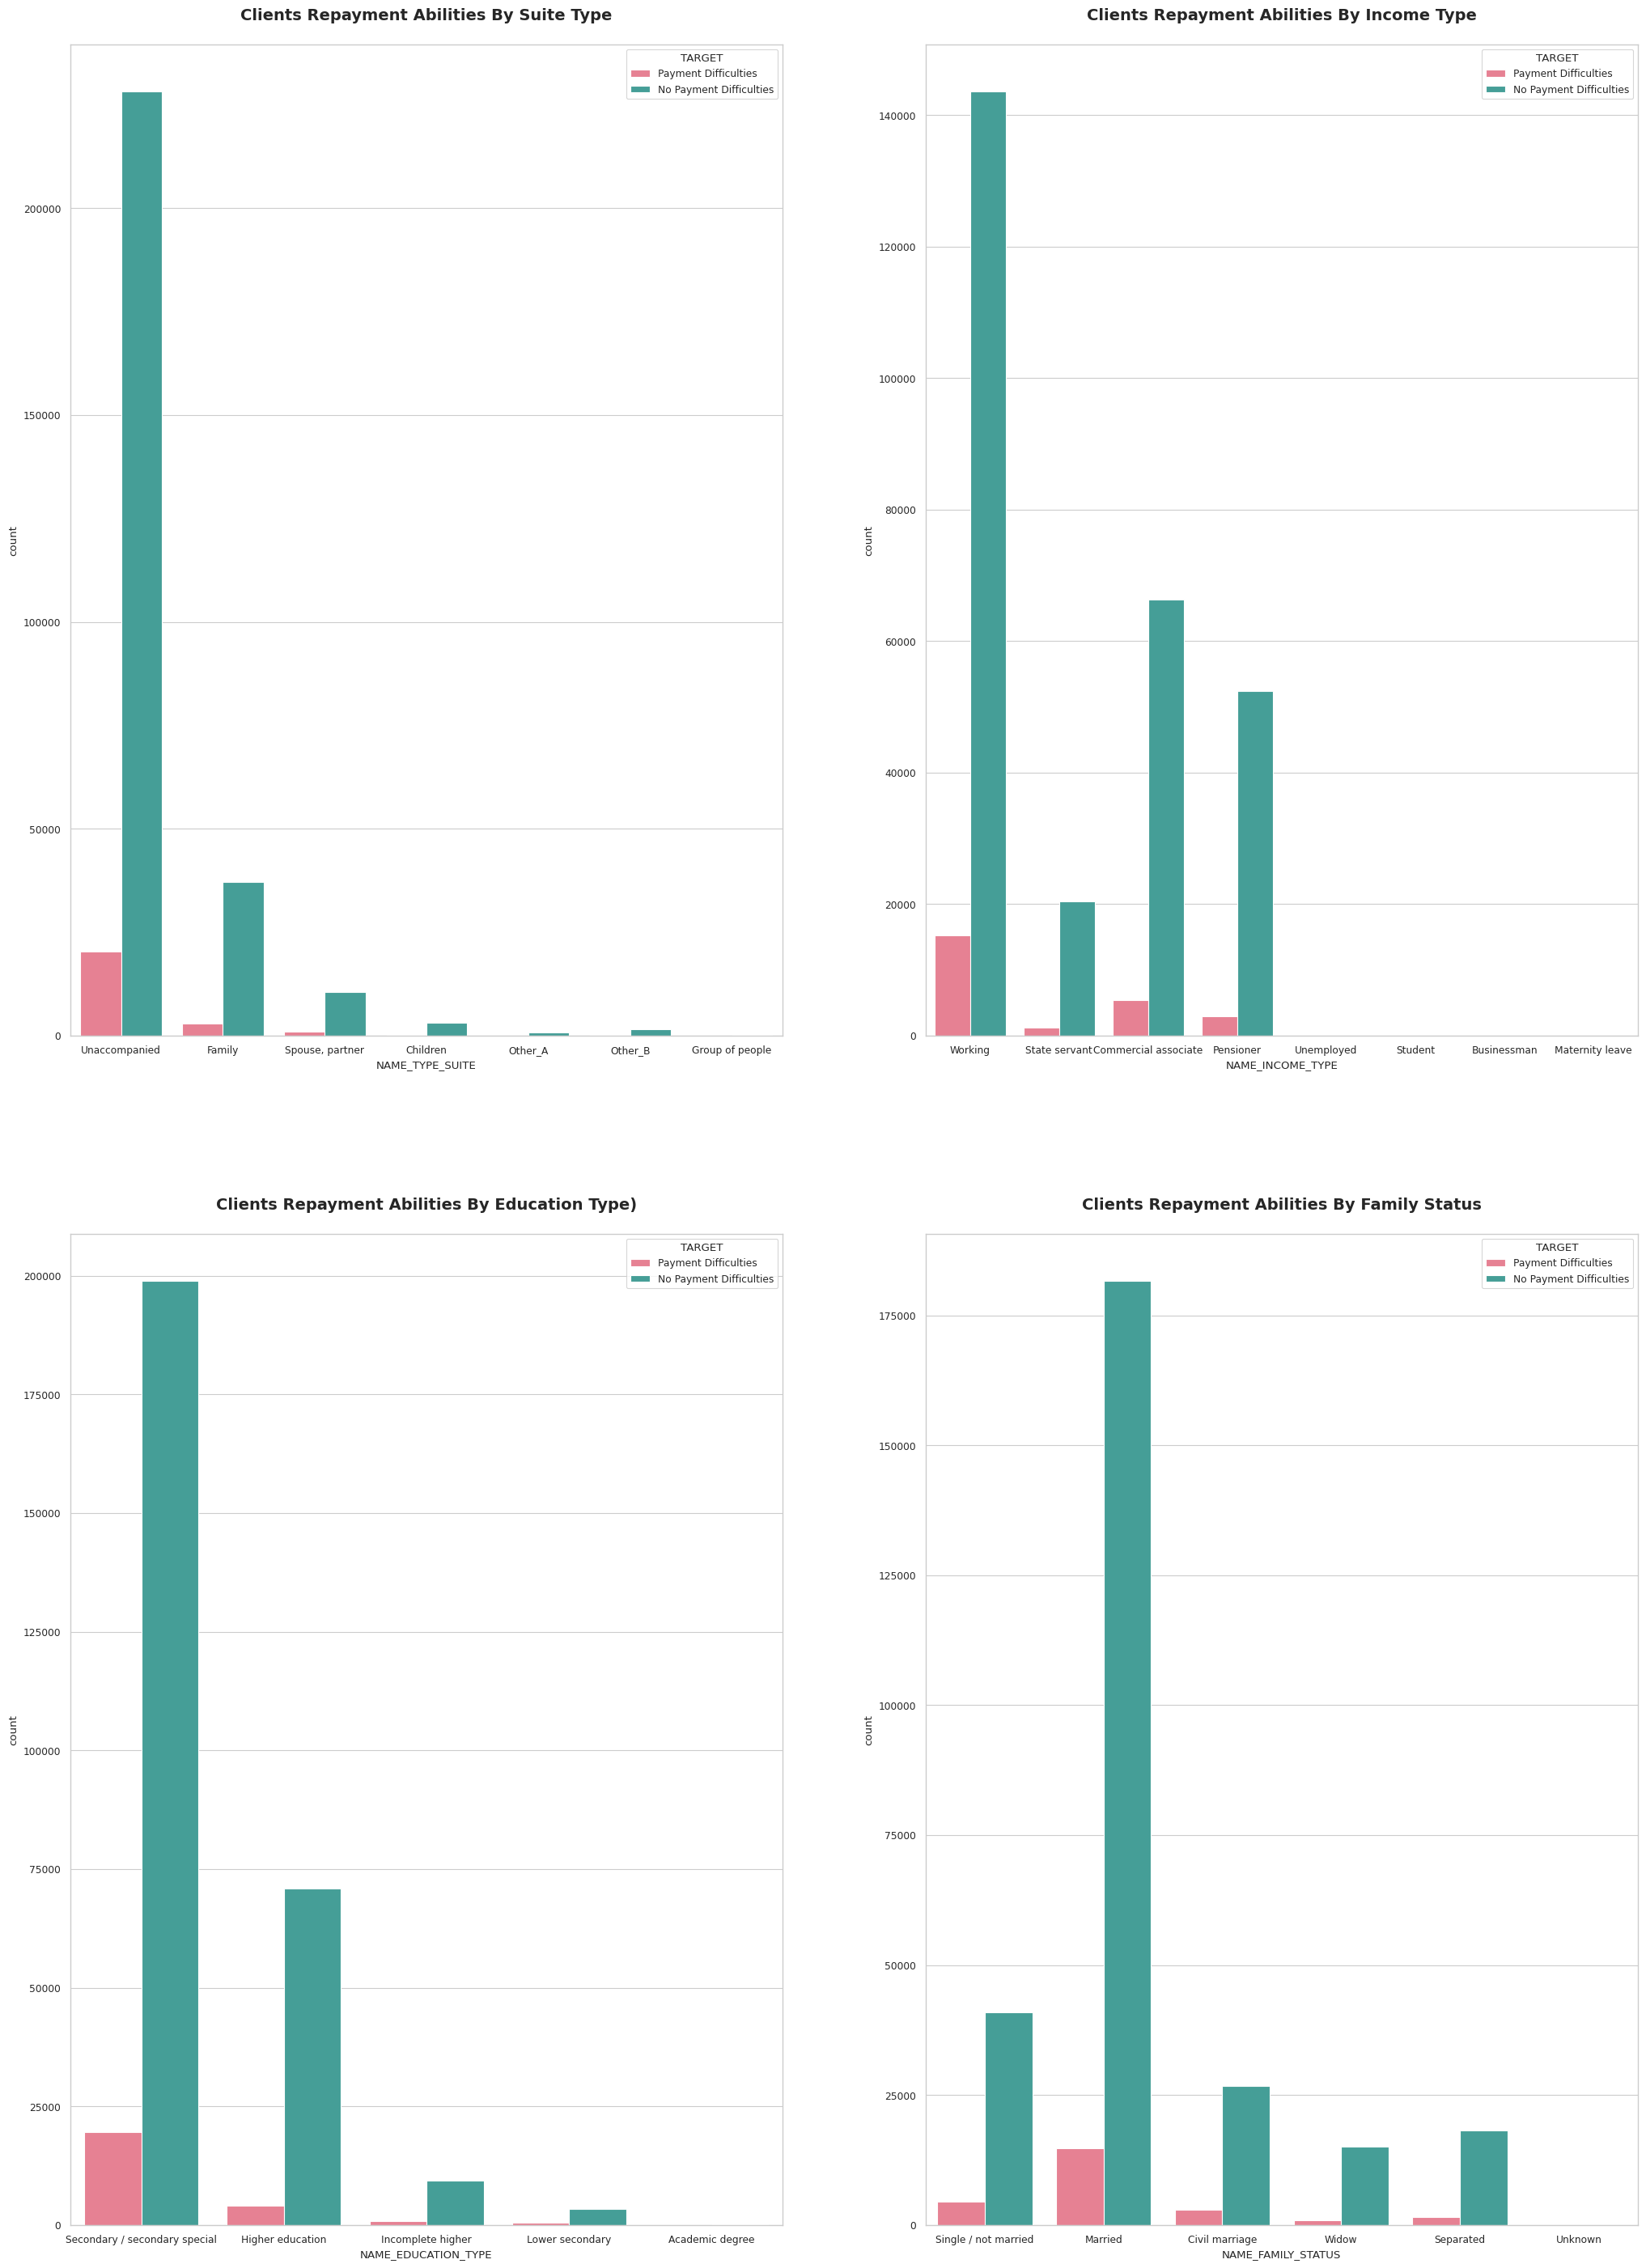

In [13]:
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = df, hue = 'TARGET', palette = 'husl', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = df, hue = 'TARGET', palette = 'husl', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = df, hue = 'TARGET', palette = 'husl', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = df, hue = 'TARGET', palette = 'husl', ax=ax[1][1])

Housing Type Vs Target

In [14]:
ht = df.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


In [15]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


It can be seen that the clients with housing type of **rented apartment** has the highest percentage (around 12%) in difficulty in repaying the loans.

Text(0.5, 0, '\nHousing Type')

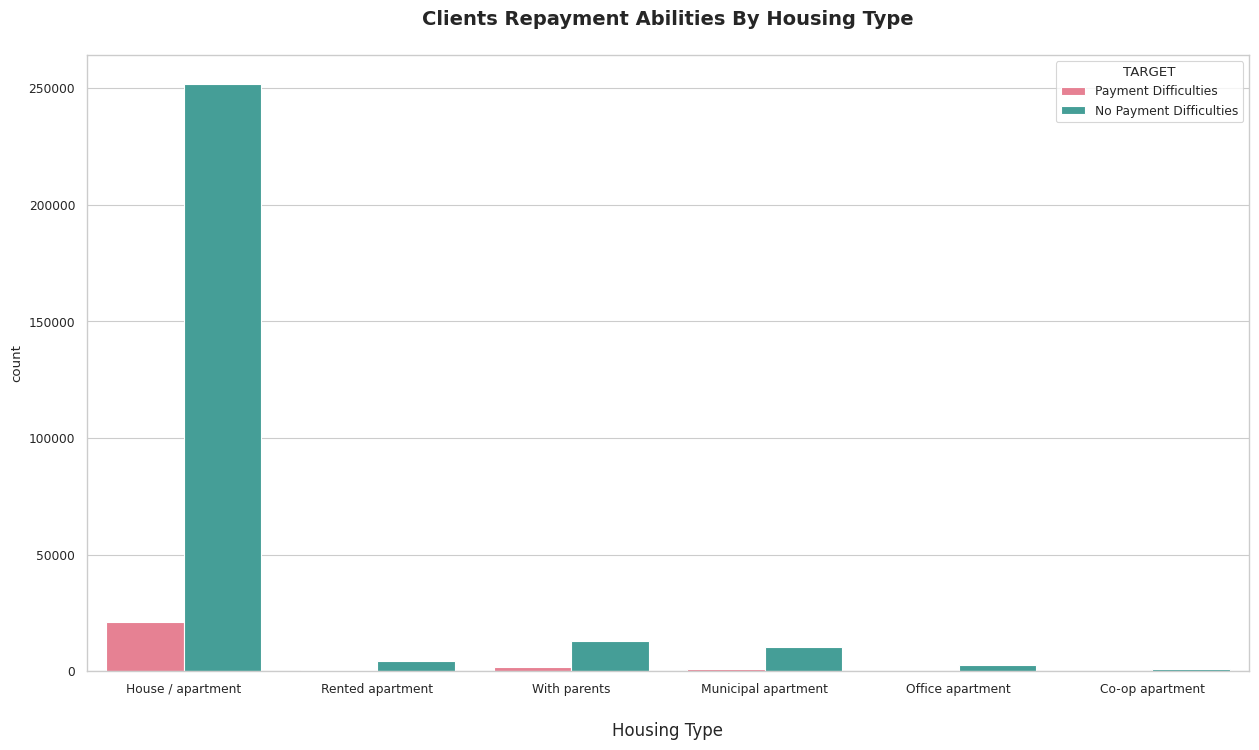

In [16]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = df, hue = 'TARGET', palette = 'husl')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Clients living in **House / apartments** has the highest number of loan apllications equal to 272K.

### Multivariate Analysis

Grouped by Realty Ownership Status

**1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status**

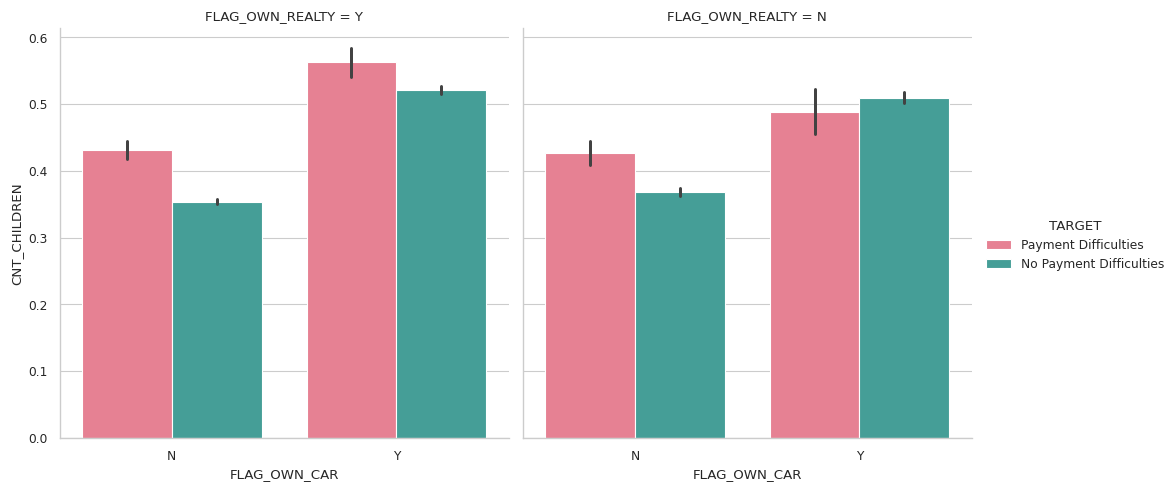

In [17]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'husl',
            data = df)
plt.show()

Clients who **own a car** and a **house/flat** have a problem repaying the loans for a high number of children compared to clients who do not own houses/flat.

**2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status**

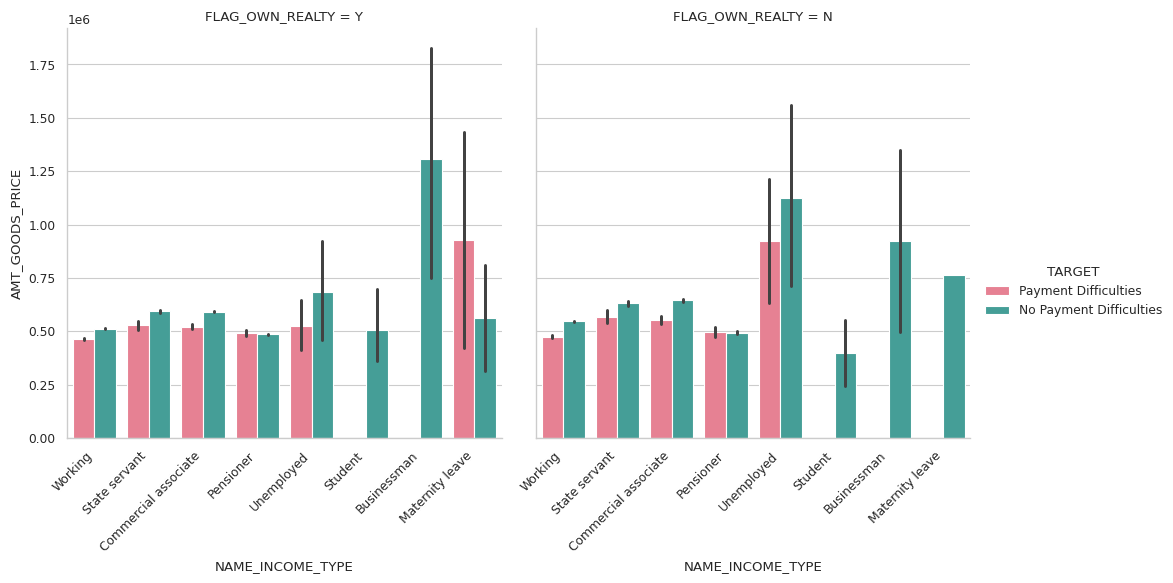

In [18]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients with income type of **maternity leave** in `FLAG_OWN_REALTY` = Yes (i.e own a house/flat) have a problem repaying the loans compared to when `FLAG_OWN_REALTY` = No (i.e not own a house/flat).

**3. Family Status, Amount of Income, Target, and House/Flat Ownership Status**

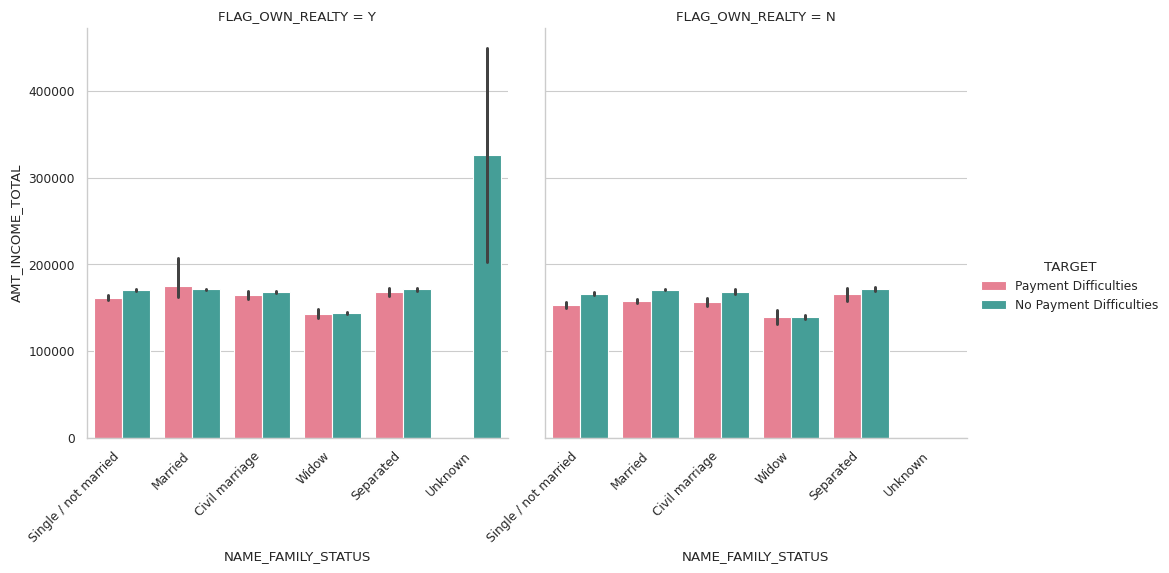

In [19]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who are **married** and **own a house/flat** (`FLAG_OWN_REALTY` = Yes) have problem repaying the loans for a medium amount of income compared to when client not own a house/flat (`FLAG_OWN_REALTY` = No).

Grouped by Car Ownership Status

**1. Contract Type, The Number of Children, Target, and Car Ownership Status**

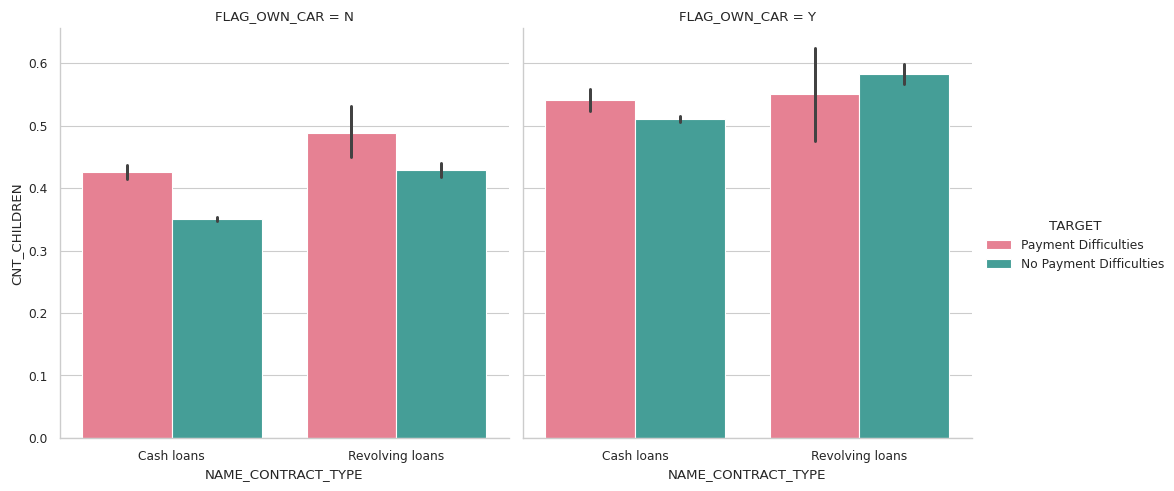

In [20]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'husl',
            data = df)
plt.show()

For **revolving loans** in `FLAG_OWN_CAR` = No (i.e not own a car) have problem repaying the loans compared to when `FLAG_OWN_CAR` = Yes (i.e own a car).

Grouped by Contract Type

**1. Income Type, Amount of Credit, Target, and Contract Type**

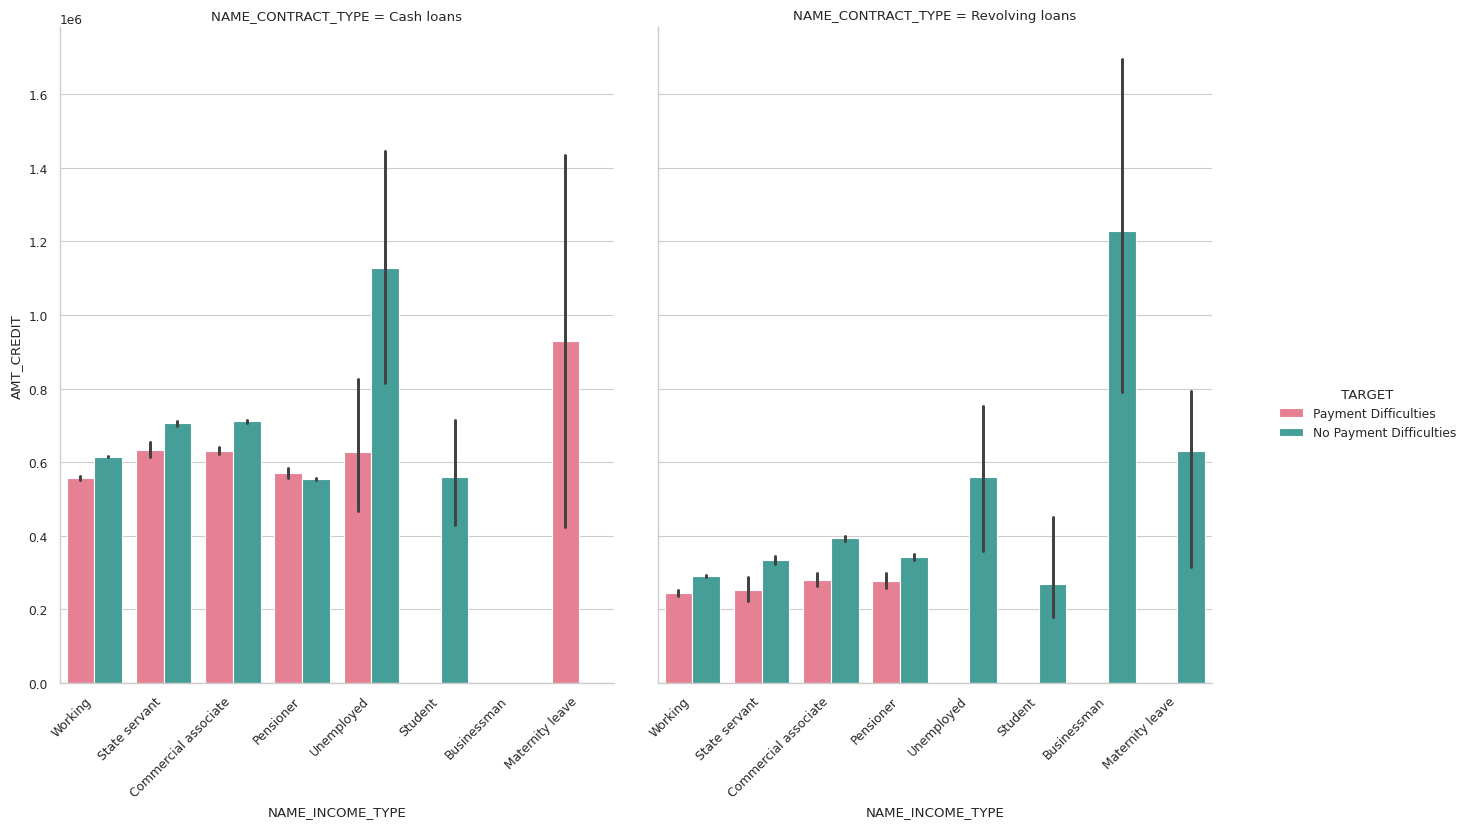

In [21]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

For the income type of **maternity leave** with **cash loans**, all the clients have problems repaying the loans for a medium credit amount of the loan. While all clients with maternity leaves and revolving loans have no difficulty repaying the loans.

For **unemployed** clients with **cash loans**, more than 50% of clients have problems repaying loans with medium credit amounts of the loan. While all unemployed clients with revolving loans have no difficulty repaying the loan.

All **student** clients have no difficulty repaying the loans either with cash loan or revolving loan for a low to medium credit amount of the loan.

Grouped by Rating of Region where Client Lives

**1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

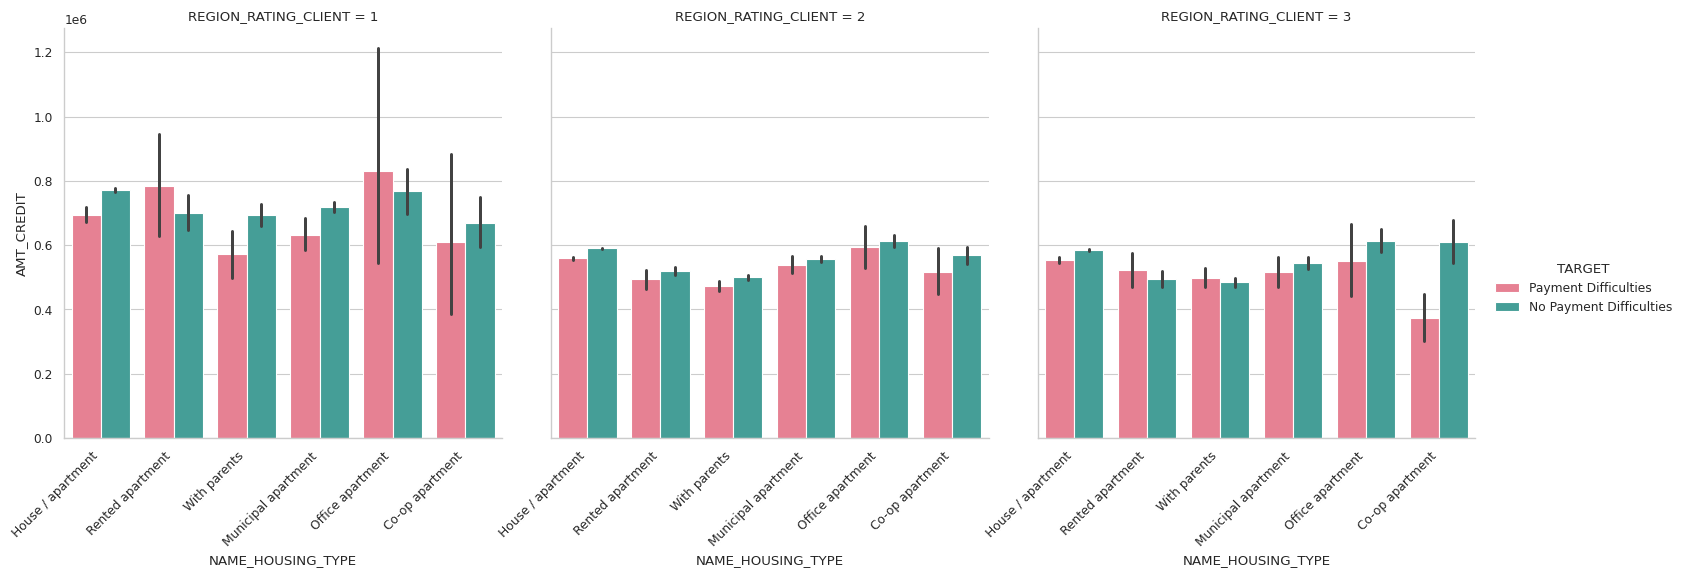

In [22]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who lives in **rented apartment** and **office apartment** and their region have a rating of 1, have a problem repaying the loans compared to client in region with rating of 2 for a medium credit amount of the loan.

**2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

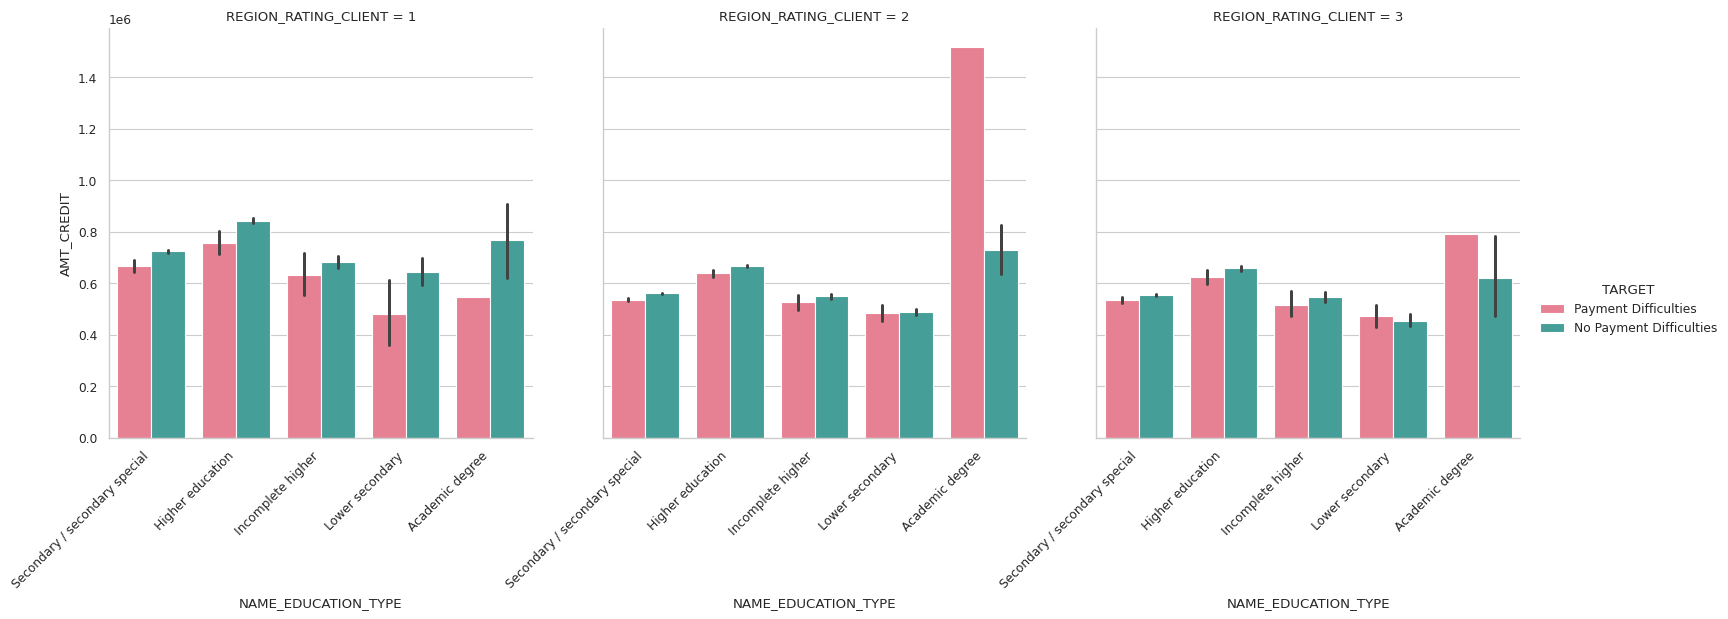

In [23]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

For client who have **academic degree** and lives in region with **rating of 2**, have a problem repaying the loans for higher amount credit of the loan. And, client with the same degree but lives in region with rating of 3 have problem repaying the loans for a medium amount credit of the loan.

**3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

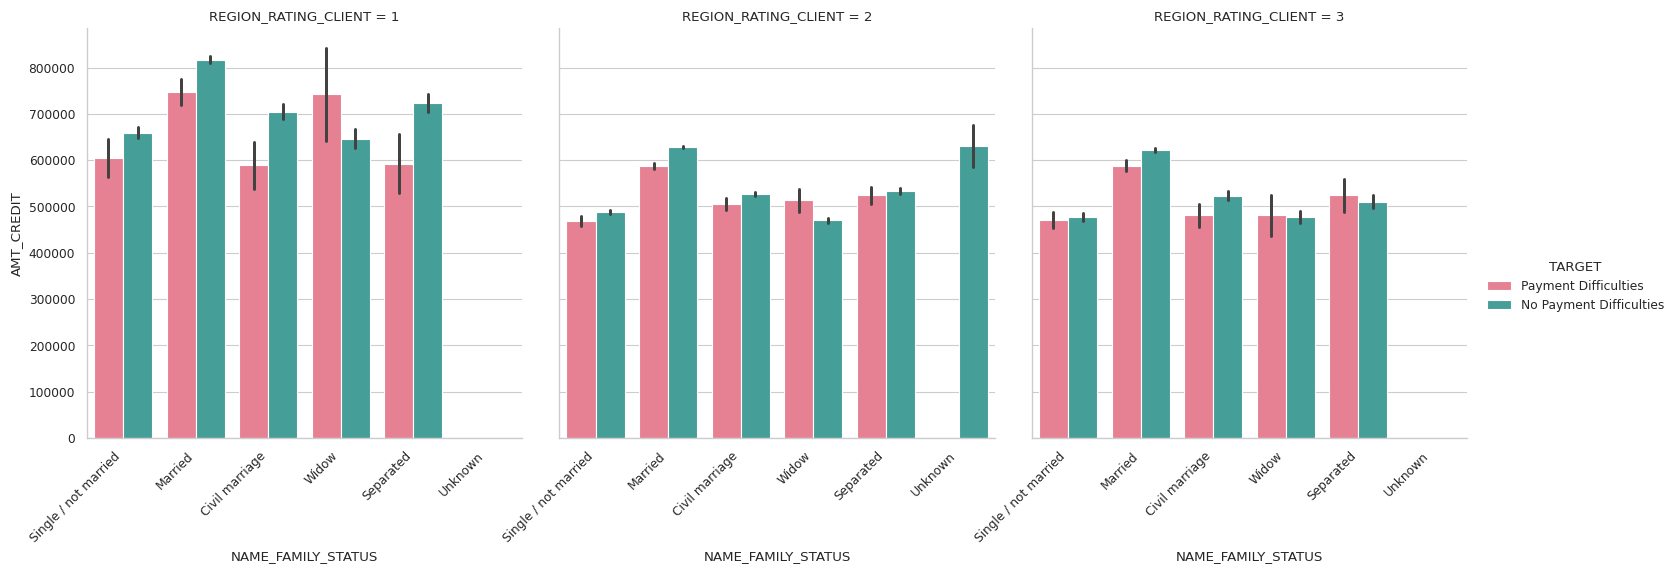

In [24]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'husl',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who have a family status as **widow**, whether they live in a region with a rating of 1, 2, or 3, have problems repaying loans for moderate to high amounts credit of the loan.

Clients who have a family status as **separated**, and live in region with a rating of 3, have problems repaying loans for a moderate amount credit of the loan compared to the clients who live in region with rating of 1 or 2.

## Data Pre-processing

###Data Cleaning

In [25]:
#check data duplication
print('The number of duplication is:', df_train.duplicated().sum())

The number of duplication is: 0


In [26]:
#check missing values
miss = pd.DataFrame(df_train.isnull().sum(), columns=['Missing Values'])
miss['Percentage'] = round(((miss['Missing Values']/len(df_train))*100),2)
print(miss)

                            Missing Values  Percentage
SK_ID_CURR                               0         0.0
TARGET                                   0         0.0
NAME_CONTRACT_TYPE                       0         0.0
CODE_GENDER                              0         0.0
FLAG_OWN_CAR                             0         0.0
...                                    ...         ...
AMT_REQ_CREDIT_BUREAU_DAY            41519        13.5
AMT_REQ_CREDIT_BUREAU_WEEK           41519        13.5
AMT_REQ_CREDIT_BUREAU_MON            41519        13.5
AMT_REQ_CREDIT_BUREAU_QRT            41519        13.5
AMT_REQ_CREDIT_BUREAU_YEAR           41519        13.5

[122 rows x 2 columns]


In [27]:
# drop features with of missing values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [28]:
#check missing values one more time
missed = pd.DataFrame(df_train.isnull().sum(), columns=['Missing Values'])
missed['Percentage'] = round(((missed['Missing Values']/len(df_train))*100),2)
missed

,Missing Values,Percentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


### Data Imputation

In [29]:
#grouping data for imputation
cats = []
nums = []
for col in df_train.columns: 
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    nums.append(col)
  else:
    cats.append(col)

In [30]:
for column in df_train:
    if df_train[column].isnull().any():
        if(column in cats):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [31]:
#check missing values after imputation

imp = pd.DataFrame(df_train.isnull().sum(), columns=['Missing Values'])
imp['Percentage'] = round(((imp['Missing Values']/len(df_train))*100),2)
imp

,Missing Values,Percentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
AMT_REQ_CREDIT_BUREAU_MON,0,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


In [32]:
#handling outliers
plt.figure(figsize=(40,160))
for i in range(0, len(nums)):
    plt.subplot(19, 4, i+1)
    sns.boxplot(y=df_train[nums[i]], palette='Paired', orient='v')
    plt.title(nums[i], fontsize=20, weight='semibold')
    plt.tight_layout()

### Feature Engineering

In [33]:
# label encoder for object features
df_train[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
     'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']] = df_train[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                                                                       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                                                                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']].apply(LabelEncoder().fit_transform)
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [34]:
#drop unecessary feature or column
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#change some features with negative values into positive values
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

In [36]:
#define variables
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [37]:
#feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
df_trainolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([df_trainolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with the target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with the target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
...,...,...
48,FLAG_DOCUMENT_5,3.020010e-02
63,FLAG_DOCUMENT_20,1.425955e-02
65,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
22,FLAG_CONT_MOBILE,7.863447e-05


### Handling Imbalanced Data

In [38]:
#create two different dataframe for majority and minority class 
df_trainaj = df_train[(df_train['TARGET']==0)] 
df_trainin = df_train[(df_train['TARGET']==1)] 

#upsample minority class
df_minority_upsampled = resample(df_trainin, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_trainaj])

### Data Splitting

In [39]:
#define x and y features (top 20 features)
x = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y = df_upsampled['TARGET']

In [40]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


###Feature Scaling

In [41]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Models Building

Machine Learning Models


1. Logistic Regression
2. Decision Tree
3. Random Forest

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

####**Logistic Regression**

In [43]:
#import logistic regression library
from sklearn.linear_model import LogisticRegression

#train the model
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 67.16%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.667774       0.675679  0.671634       0.671727   
recall          0.683348       0.659916  0.671634       0.671632   
f1-score        0.675471       0.667705  0.671634       0.671588   
support    226185.000000  226112.000000  0.671634  452297.000000   

            weighted avg  
precision       0.671726  
recall          0.671634  
f1-score        0.671589  
support    452297.000000  
_______________________________________________
Confusion Matrix: 
 [[154563  71622]
 [ 76897 149215]]

Test Result:
Accuracy Score: 67.29%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.668736      0.677255  0.672899       0.672995       0.672998
recall         0.684395      0.661417  0.672899  

In [44]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.16339,67.289852


###Random Forest

In [57]:
#import random forest library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    226185.0  226112.0       1.0   452297.0      452297.0
_______________________________________________
Confusion Matrix: 
 [[226185      0]
 [     0 226112]]

Test Result:
Accuracy Score: 99.65%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.999448      0.993569  0.996489       0.996508       0.996506
recall         0.993522      0.999452  0.996489       0.996487       0.996489
f1-score       0.996476      0.996502  0.996489       0.996489       0.996489
support    56501.000000  56574.000000  0.99

In [58]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-58-9dfba9c0999c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.163390,67.289852
1,XGBoost Classifier,74.709538,71.832854
2,Random Forest Classifier,100.000000,99.648906


##Models Hyperparameter Tuning

###Logistic Regression Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 67.16%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.667751       0.675691  0.671627       0.671721   
recall          0.683392       0.659859  0.671627       0.671625   
f1-score        0.675481       0.667681  0.671627       0.671581   
support    226185.000000  226112.000000  0.671627  452297.000000   

            weighted avg  
precision       0.671720  
recall          0.671627  
f1-score        0.671582  
support    452297.000000  
_______________________________________________
Confusion Matrix: 
 [[154573  71612]
 [ 76910 149202]]

Test Result:
Accuracy Score: 67.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted av

In [48]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,67.162727,67.282777


###Random Forest Hyperparameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [5, 20, 50, 100]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Train Result:
Accuracy Score: 99.52%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999607       0.990877  0.995204       0.995242   
recall          0.990800       0.999611  0.995204       0.995205   
f1-score        0.995184       0.995225  0.995204       0.995204   
support    226185.000000  226112.000000  0.995204  452297.000000   

            weighted avg  
precision       0.995243  
recall          0.995204  
f1-score        0.995204  
support    452297.000000  
_______________________________________________
Confusion Matrix: 
 [[224104   2081]
 [    88 226024]]

Test Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                 

In [61]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

<ipython-input-61-d55d0aabfe00>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,67.162727,67.282777
1,Tuned Random Forest Classifier,99.520448,95.338492


##Model Evaluation

###Logistic Regression

In [51]:
#predict data train
y_train_pred_logr = lr_clf.predict(X_train)

#predict data test
y_test_pred_logr = lr_clf.predict(X_test)

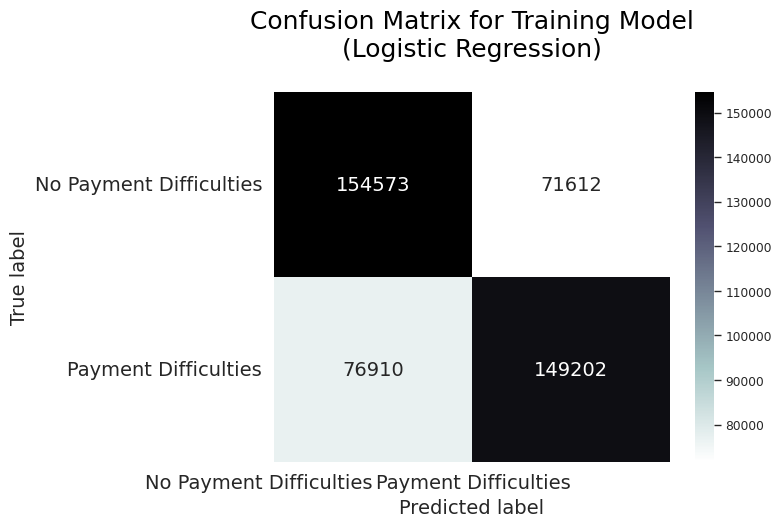

In [52]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_logr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

#plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

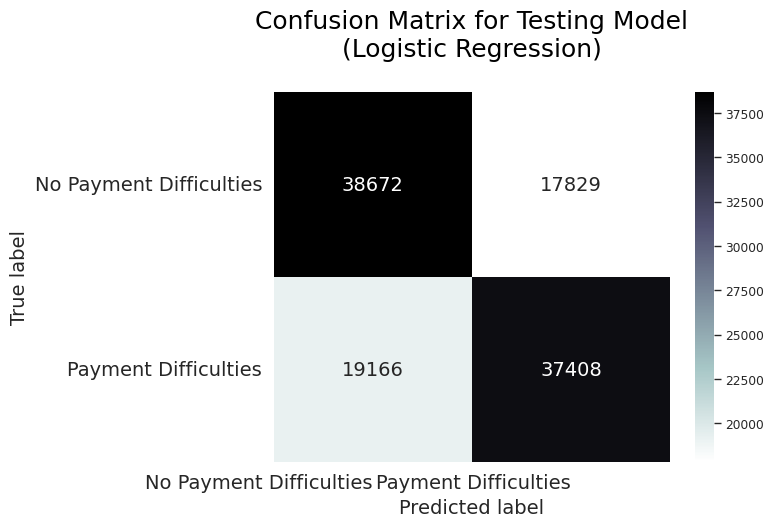

In [53]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_logr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

#plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [54]:
#ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_logr),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6728


###Random Forest

In [62]:
#predict data train
y_train_pred_rf = rf_clf.predict(X_train)

#predict data test
y_test_pred_rf = rf_clf.predict(X_test)

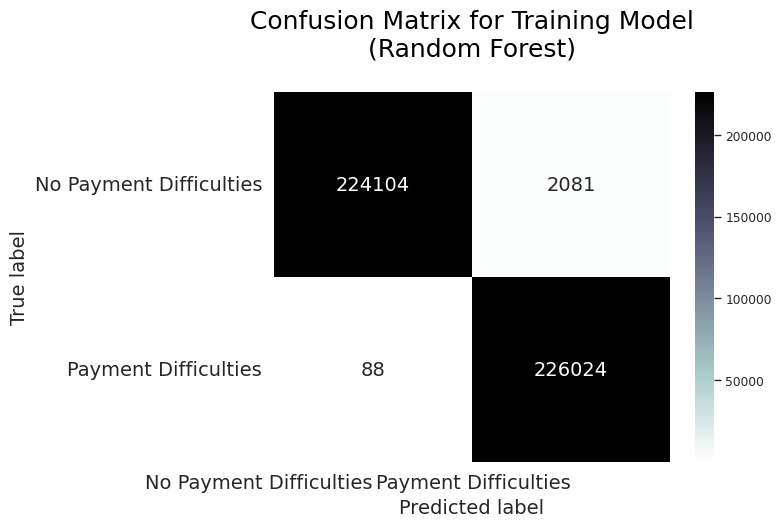

In [63]:
#form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

#plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

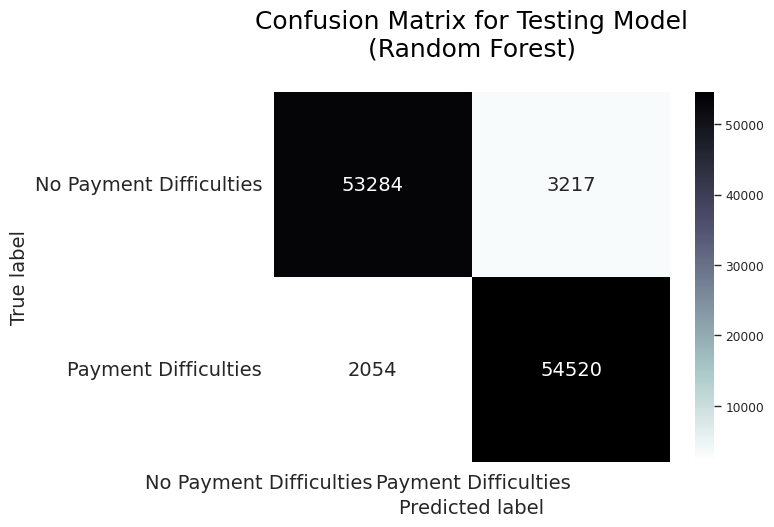

In [64]:
#form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

#plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [65]:
#ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9534


##Feature Importance
using Random Forest

<ipython-input-66-05ee5d7ffe66>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


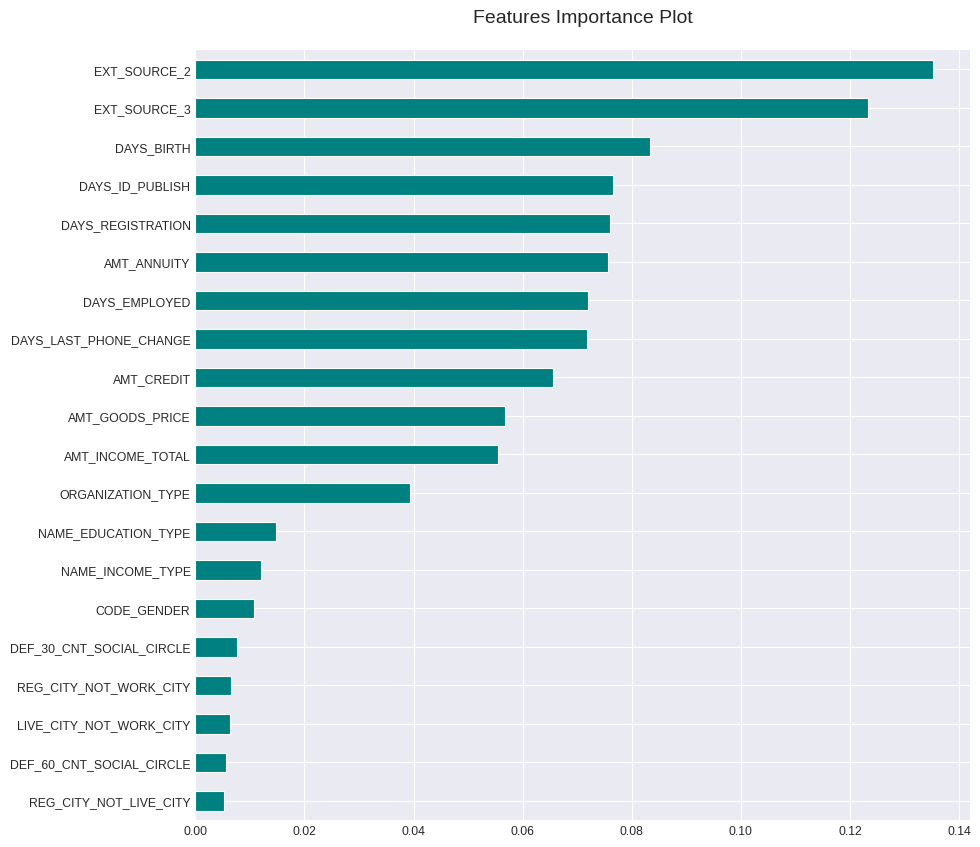

In [66]:
#important features
importances_rf = pd.Series(rf_clf.feature_importances_, index=x.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

## Model Selection

In [71]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6728, 0.6728],
                        ["Random Forest", 0.9952, 0.9533, 0.9534],],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=True).style.background_gradient(cmap='rocket')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
0,Logistic Regression,0.671600,0.672800,0.672800
1,Random Forest,0.995200,0.953300,0.953400


## Business Recommendation

1. Prioritize married customers, as they tend to have high credit ratings and more stable financial situations, it may be beneficial to provide incentives or promotions to encourage them to utilize your company's financial services. 
2. It's important to maintain good relationships with business people who have revolving loans and a positive payment history, as they can be valuable customers who may be interested in additional financial products or services.
3.  Properly serve widow customers, who often have lower incomes and medium credit ratings with payment difficulties, it's crucial to evaluate their financial situations thoroughly and offer appropriate financial products and services. 